# Import data

In [5]:
import pandas as pd
import numpy as np
%matplotlib notebook

In [15]:
housing = pd.read_csv('kc_train.csv')
housing.head()

,SaleDate,SalePrice,BedroomNum,BathroomNum,GrLivArea,ParkingArea,Floor,Rating,TotalArea,BsmtArea,BuiltYear,RebuildYear,Latitude,Longitude
0,20150302,545000,3,2.25,1670,6240,1.0,8,1240,430,1974,0,47.6413,-122.113
1,20150211,785000,4,2.50,3300,10514,2.0,10,3300,0,1984,0,47.6323,-122.036
2,20150107,765000,3,3.25,3190,5283,2.0,9,3190,0,2007,0,47.5534,-122.002
3,20141103,720000,5,2.50,2900,9525,2.0,9,2900,0,1989,0,47.5442,-122.138
4,20140603,449500,5,2.75,2040,7488,1.0,7,1200,840,1969,0,47.7289,-122.172


In [16]:
#To see the attributes
print(housing.columns)

Index(['SaleDate', 'SalePrice', 'BedroomNum', 'BathroomNum', 'GrLivArea',
       'ParkingArea', 'Floor', 'Rating', 'TotalArea', 'BsmtArea', 'BuiltYear',
       'RebuildYear', 'Latitude', 'Longitude'],
      dtype='object')


# Part1: Exploratory data analysis

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

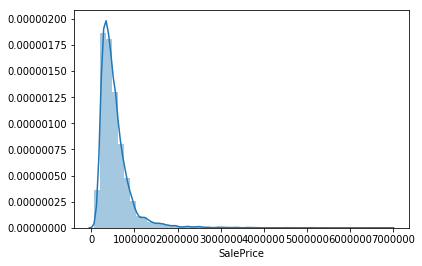

In [18]:
# SalePrice distribution chart
sns.distplot(housing['SalePrice'])

Seem like ~Normal distribution

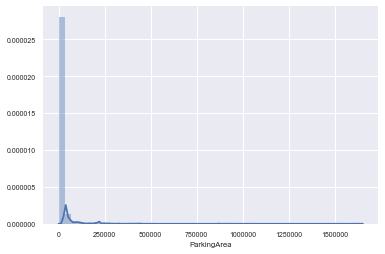

In [52]:
# ParkingArea distribution chart
sns.distplot(housing['ParkingArea'])

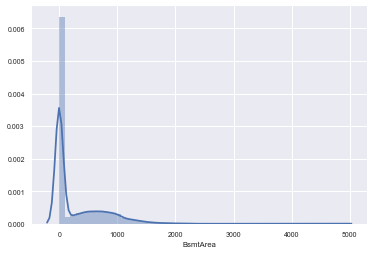

In [51]:
# BsmtArea distribution chart
sns.distplot(housing['BsmtArea'])

See lots of house without parking area

# Explore Correlation via Continuous variables

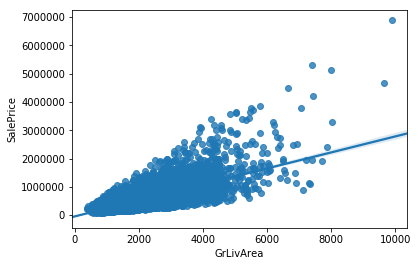

In [19]:
sns.regplot(data=housing, x='GrLivArea', y='SalePrice')

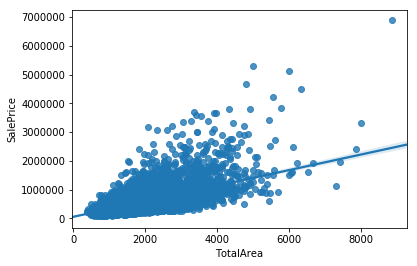

In [23]:
sns.regplot(data=housing, x='TotalArea', y='SalePrice')

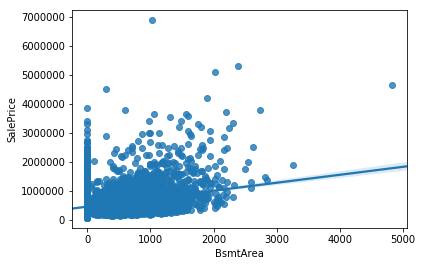

In [24]:
sns.regplot(data=housing, x='BsmtArea', y='SalePrice')

All show some positive correlation

# Explore Correlation via Discrete variables

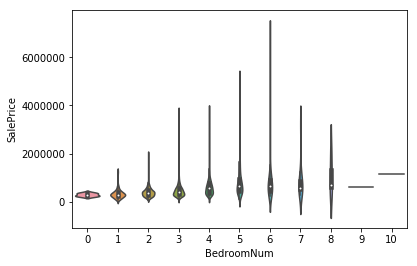

In [31]:
sns.violinplot(data=housing, x='BedroomNum', y='SalePrice')

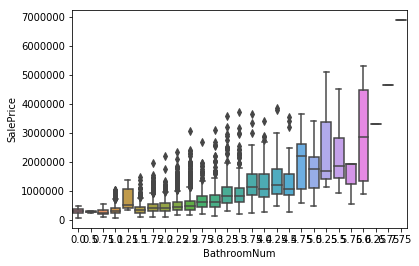

In [33]:
sns.boxplot(data=housing, x='BathroomNum', y='SalePrice')

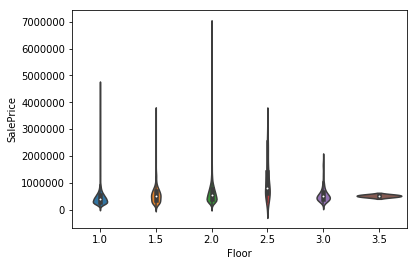

In [30]:
sns.violinplot(data=housing, x='Floor', y='SalePrice')

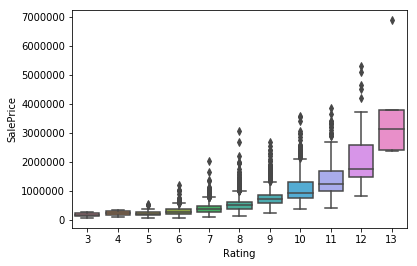

In [34]:
sns.boxplot(data=housing, x='Rating', y='SalePrice')

# Heat Map

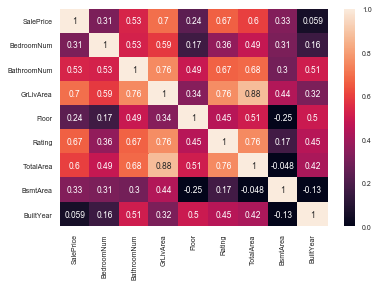

In [35]:
info = ['SalePrice', 'BedroomNum', 'BathroomNum', 'GrLivArea', 'Floor', 'Rating', 'TotalArea', 'BsmtArea', 'BuiltYear']
sns.set(font_scale=0.7)
sns.heatmap(housing[info].corr(),annot=True, vmin=0, vmax=1)

Conclusion  | 
** Highest Correlation: GrLivArea-SalePrice  |  
** High correlation: Rating-SalePrice, TotalArea-SalePrice, BathroomNum


# Part2: Predictive data analysis

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [48]:
features = ['GrLivArea','Rating', 'TotalArea']
target = 'SalePrice'
lr = LinearRegression()
rf = RandomForestRegressor(100)
models = [lr, rf]
for model in models:
    scores = cross_val_score(model, housing[features], housing[target], cv=5, scoring='neg_mean_absolute_error')
    print(type(model).__name__, np.mean(scores))

LinearRegression -165127.326673
RandomForestRegressor -164812.284466


In [49]:
features = ['GrLivArea','Rating', 'TotalArea','BathroomNum']
target = 'SalePrice'
lr = LinearRegression()
rf = RandomForestRegressor(100)
models = [lr, rf]
for model in models:
    scores = cross_val_score(model, housing[features], housing[target], cv=5, scoring='neg_mean_absolute_error')
    print(type(model).__name__, np.mean(scores))

LinearRegression -164021.249177
RandomForestRegressor -164536.524135


In [53]:
housing['LogArea'] = np.log(housing['GrLivArea'])
housing['LogTotalArea'] = np.log(housing['TotalArea'])
new_features = ['LogArea', 'Rating', 'LogTotalArea', 'BathroomNum']
target = 'SalePrice'
lr = LinearRegression()
rf = RandomForestRegressor(100)
models = [lr, rf]
for model in models:
    scores = cross_val_score(model, housing[new_features], housing[target], cv=5, scoring='neg_mean_absolute_error')
    print(type(model).__name__, np.mean(scores))

LinearRegression -173144.296086
RandomForestRegressor -164481.018937


After adding/revising new feature, we see RandomForestRegressor has a lower neg_mean_absolute_error